# Analyse der Zensusdaten bzw. des Stimmanteils der Grünen bei der BTW 2025 in Rheinland-Pfalz 

## Hier: Mithilfe absoluter Zahlen

In [2]:
# Pakete laden:
import pandas as pd
import geopandas as gpd
from tobler.model import glm
from tobler.area_weighted import area_interpolate
from tobler.pycno import pycno_interpolate
import matplotlib.pyplot as plt

In [3]:
# Laden der Daten, die wir in data_editing_absolut.py 
# bzw. _anteile.py zusammengestellt haben

# Landkreis-Struktur
zensus_landkreise_geo = gpd.read_file("editing_ergebnis/zensus_landkreise_absolut.gpkg")
# 1-qkm-Grid
zensus_1km_rlp = gpd.read_file("editing_ergebnis/zensus_1km_rlp_absolut.gpkg")

Wie sah das Wahlergebnis der Grünen (Zweitstimme) denn auf Ebene der Landkreise aus?

<Axes: >

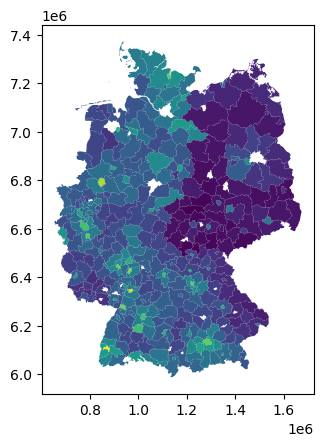

In [3]:
zensus_landkreise_geo.plot(column="GRUENE_Anteil")

Und in Rheinland-Pfalz:

<Axes: >

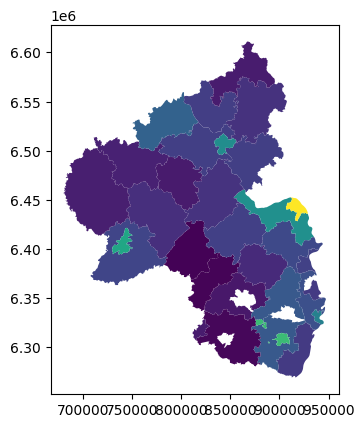

In [4]:
rheinland_pfalz = gpd.read_file("SHP_BTW2025/23_LK_1_BTW2025.shp")
rheinland_pfalz.to_crs(zensus_1km_rlp.crs, inplace=True)

zensus_landkreise_rlp = zensus_landkreise_geo.clip(rheinland_pfalz)

zensus_landkreise_rlp.plot(column="GRUENE_Anteil")

Wir können hier nun Werte mit tobler interpolieren, dafür gibt es verschiedene Methoden. 

In [5]:
# Da wir hauptsächlich absolute Werte haben, aber doch ein paar Anteile in den Daten enthalten sind, 
# müssen wir definieren, was was ist.

# Anteile und Durchschnittswerte: Die 
# Summe der Werte in den kleineren Gebieten muss
# nicht der Summe im groesseren Gebiet entsprechen
intensive_cols = ['Durchschnittliche Haushaltsgröße',
       'Durchschnittliche Nettokaltmiete/qm', 'Eigentümerquote',
       'Leerstandsquote', "Ausländeranteil", "Einwohnerdichte", "GRUENE_Anteil"]

extensive_cols = ["Einwohner", 'Gas', 'Heizöl', 'Holz/Holzpellets',
       'Biomasse/Biogas', 'Solar/Geothermie/Wärmepumpe', 'Strom', 'Kohle',
       'Fernwärme', 'kein Energieträger',
       'Fernheizung', 'Etagenheizung', 'Blockheizung', 'Zentralheizung',
       'Einzel-/ Mehrraumöfen', 'keine Heizung', 'Personen unter 18 Jahren',
       'Personen 18 - 29 Jahre', 'Personen 30 - 49 Jahre',
       'Personen 50 - 64 Jahre', 'Personen 65 Jahre und älter',
       'Gebäude vor 1919',
       'Gebäude ab 1919 bis 1948', 'Gebäude ab 1949 bis 1978',
       'Gebäude ab 1979 bis 1990', 'Gebäude ab 1991 bis 2000',
       'Gebäude ab 2001 bis 2010', 'Gebäude ab 2011 bis 2019',
       'Gebäude ab 2020 und später', "GRUENE"]

Einfache Interpolation

In [6]:
test1 = area_interpolate(source_df = zensus_landkreise_rlp, 
                         target_df=zensus_1km_rlp, n_jobs=3, 
                         intensive_variables=intensive_cols,
                         extensive_variables=extensive_cols
                         )




/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Einwohner, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Gas, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Heizöl, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Holz/Holzpellets, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hacka

<Axes: >

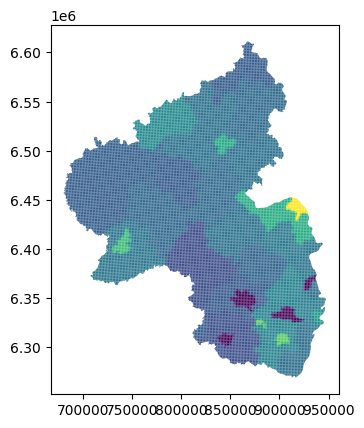

In [7]:
test1.plot(column="GRUENE_Anteil")

Dies gibt uns nicht wirklich neue Erkenntnisse. Probieren wir es stattdessen mit einer Pycno-Interpolation.

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: Ru

<Axes: >

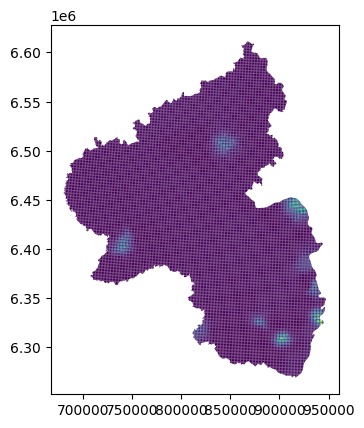

In [8]:
test2 = pycno_interpolate(source_df = zensus_landkreise_rlp, 
                         target_df=zensus_1km_rlp, 
                         variables= intensive_cols+extensive_cols, 
                         cellsize=1000)

test2.plot(column="GRUENE_Anteil")


Das tobler Paket erlaubt, ein Generalized Linear Model zu schätzen, das dann für die Interpolation verwendet werden kann. Großer Nachteil: Wir schätzen absolute Zahlen. 

In [21]:
# Teilweise haben wir perfekte Kolinearität
# deshalb muss in jeder Kategorie mindestens eine Gruppe raus
regression_variables = ['Shape_Leng',
       'Shape_Area', 
       'Einwohner', 'Personen 18 - 29 Jahre',
       'Personen 30 - 49 Jahre', 'Personen 50 - 64 Jahre',
       'Personen 65 Jahre und älter', 'Ausländeranteil',
       'Durchschnittliche Haushaltsgröße',
       'Durchschnittliche Nettokaltmiete/qm', 'Blockheizung', 'Etagenheizung',
       'Fernheizung', 'Einzel-/ Mehrraumöfen',
       'Zentralheizung', 'Fernwärme', 'Gas', 'Holz/Holzpellets', 'Heizöl',
       'Kohle', 'Solar/Geothermie/Wärmepumpe', 'Strom',
       'Biomasse/Biogas', 'Leerstandsquote', 'Eigentümerquote',
       'Gebäude ab 1919 bis 1948',
       'Gebäude ab 1949 bis 1978', 'Gebäude ab 1979 bis 1990',
       'Gebäude ab 1991 bis 2000', 'Gebäude ab 2001 bis 2010',
       'Gebäude ab 2011 bis 2019', 'Gebäude ab 2020 und später',
       'GRUENE', 'GRUENE_Anteil', 'geometry']

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: overflow encountered in exp
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 GRUENE   No. Observations:                   19
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0695e+05
Date:                Sat, 08 Nov 2025   Deviance:                   4.1369e+05
Time:                        13:44:09   Pearson chi2:                 3.85e+07
No. Iterations:                     8   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
np.log1p(Type_21)     4.3588      0.00

<Axes: >

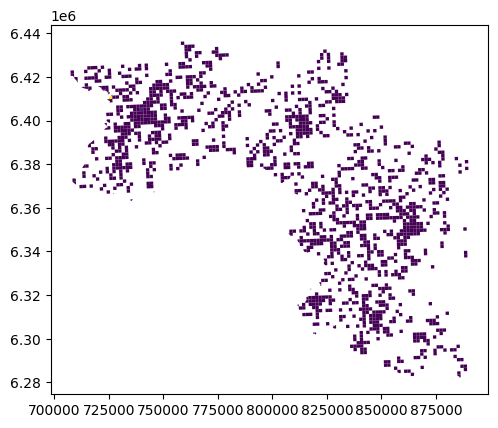

In [27]:
test3, model = glm(source_df = zensus_landkreise_geo[regression_variables].dropna(), target_df = zensus_1km_rlp.dropna(), variable="GRUENE",
                   raster="rasterdaten/rasterdaten_clipped.tif", likelihood = "poisson", 
                   return_model=True)
print(model.summary())
test3.plot(column="GRUENE")